In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset

In [2]:
folder_paths = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\digitdataset1",
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\-',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\(',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\)',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\+',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\÷',
]

In [3]:
X, y = load_dataset(folder_path=folder_paths)

Loading Dataset .............
Total images lodded: 104366


In [4]:
X.shape

torch.Size([104366, 1, 28, 28])

In [5]:
X = X.reshape(-1, 28*28)
X.shape

torch.Size([104366, 784])

In [6]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [7]:
X.mean(axis=0, keepdim=True).shape

torch.Size([1, 784])

In [8]:
X -= X.mean(axis=0, keepdim=True)
X.shape

torch.Size([104366, 784])

In [9]:
cov = X.T @ X
cov.shape

torch.Size([784, 784])

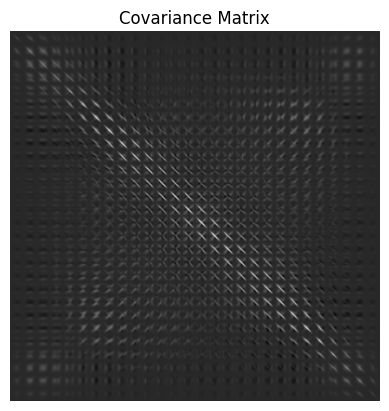

In [10]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [12]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95149152, 0.95301301, 0.95453124, 0.95604621, 0.95750906,
       0.95897516, 0.96042497, 0.96187805, 0.96333763, 0.96479396,
       0.96624052, 0.96768382, 0.96912386, 0.97056064, 0.97187687,
       0.97319637, 0.97442789, 0.97581906, 0.97714507, 0.97852973,
       0.97991764, 0.98115568, 0.98239698, 0.98372951, 0.98505877,
       0.98644017, 0.98767496, 0.98899771, 0.99031068, 0.99153895,
       0.99284867, 0.99407368, 0.99517489, 0.99589817, 0.99711992,
       0.99806149, 0.99927998, 1.        ])

In [13]:
W = eigenvectors[:, :746]
W.shape

torch.Size([784, 746])

In [14]:
new_X = W.T @ X.T 

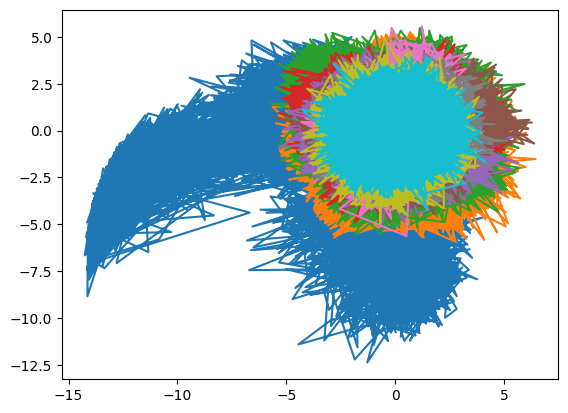

In [15]:
plt.plot(new_X[0], new_X[1], new_X[2], new_X[3], new_X[4], new_X[5], new_X[6], new_X[7], new_X[8], new_X[9], new_X[10], new_X[11], new_X[12], new_X[13], new_X[14], new_X[15], new_X[16], new_X[17], new_X[18], new_X[19])
